# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

In [ ]:
# get the data

import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-29 10:56:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   120MB/s    in 0.9s    

2024-02-29 10:56:13 (120 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Lets work with the data

import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turning our training part inot pyhton path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
# view the image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1 )

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img


Image shape: (512, 512, 3)


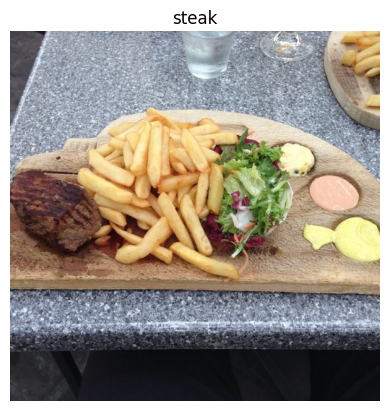

In [ ]:
# view the image

img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "steak")

array([[[ 74,  69,  76],
        [ 74,  69,  76],
        [ 73,  68,  75],
        ...,
        [221, 197, 133],
        [219, 191, 126],
        [217, 189, 124]],

       [[ 73,  68,  75],
        [ 72,  67,  74],
        [ 70,  65,  72],
        ...,
        [219, 194, 128],
        [213, 184, 118],
        [206, 177, 111]],

       [[ 73,  68,  75],
        [ 71,  66,  73],
        [ 69,  64,  71],
        ...,
        [209, 180, 112],
        [201, 168,  99],
        [193, 160,  91]],

       ...,

       [[ 37,  35,  36],
        [ 44,  42,  43],
        [ 52,  50,  51],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 35,  33,  34],
        [ 41,  39,  40],
        [ 49,  47,  48],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]],

       [[ 32,  30,  31],
        [ 37,  35,  36],
        [ 44,  42,  43],
        ...,
        [ 16,  16,  24],
        [ 17,  17,  25],
        [ 18,  18,  26]]], dtype=uint8)
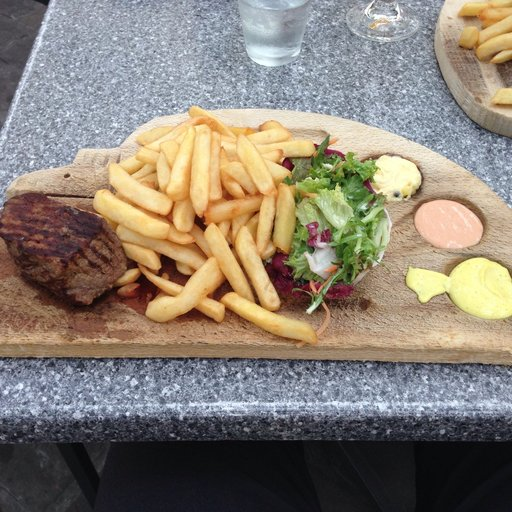

In [ ]:
img

In [ ]:
img/255

array([[[0.29019608, 0.27058824, 0.29803922],
        [0.29019608, 0.27058824, 0.29803922],
        [0.28627451, 0.26666667, 0.29411765],
        ...,
        [0.86666667, 0.77254902, 0.52156863],
        [0.85882353, 0.74901961, 0.49411765],
        [0.85098039, 0.74117647, 0.48627451]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.28235294, 0.2627451 , 0.29019608],
        [0.2745098 , 0.25490196, 0.28235294],
        ...,
        [0.85882353, 0.76078431, 0.50196078],
        [0.83529412, 0.72156863, 0.4627451 ],
        [0.80784314, 0.69411765, 0.43529412]],

       [[0.28627451, 0.26666667, 0.29411765],
        [0.27843137, 0.25882353, 0.28627451],
        [0.27058824, 0.25098039, 0.27843137],
        ...,
        [0.81960784, 0.70588235, 0.43921569],
        [0.78823529, 0.65882353, 0.38823529],
        [0.75686275, 0.62745098, 0.35686275]],

       ...,

       [[0.14509804, 0.1372549 , 0.14117647],
        [0.17254902, 0.16470588, 0.16862745],
        [0.20392157, 0

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 168ms/step - loss: 0.5793 - accuracy: 0.6733 - val_loss: 0.4017 - val_accuracy: 0.8360
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4265 - accuracy: 0.8113 - val_loss: 0.3593 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3798 - accuracy: 0.8373 - val_loss: 0.4245 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4108 - accuracy: 0.8267 - val_loss: 0.3556 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3330 - accuracy: 0.8620 - val_loss: 0.3117 - val_accuracy: 0.8640


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 126ms/step - loss: 0.8525 - accuracy: 0.4873 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 140ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Lets try to improve the model

# seed

tf.random.set_seed(42)

# model

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 111ms/step - loss: 2.5044 - accuracy: 0.6407 - val_loss: 2.5038 - val_accuracy: 0.5400
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 1.2738 - accuracy: 0.7007 - val_loss: 0.8228 - val_accuracy: 0.6520
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.8974 - accuracy: 0.7000 - val_loss: 1.5270 - val_accuracy: 0.5700
Epoch 4/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5709 - accuracy: 0.7673 - val_loss: 0.4529 - val_accuracy: 0.7740
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6311 - accuracy: 0.7413 - val_loss: 0.6496 - val_accuracy: 0.7300


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 382, 3)


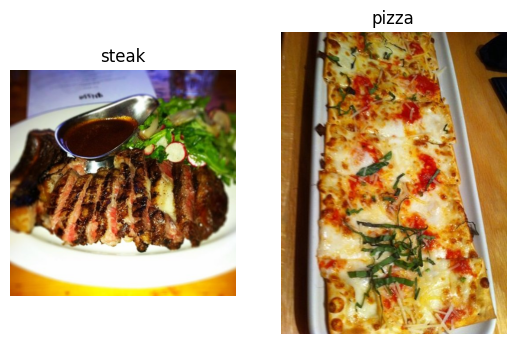

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Lets break down our CNN model

In [ ]:
# Define training and test directory paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Lets create a instance to normalize the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [ ]:
# Turn it into the batches

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               batch_size = 32)

test_data = train_datagen.flow_from_directory(directory=test_dir,\
                                              target_size = (224, 224),
                                              class_mode = "binary",
                                              batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

In [ ]:
# Our model is overfitting right now let try to fix it

# Lets try with the MaxPool2D() layer

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile
model_5.compile(loss = "binary_crossentropy",
               optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 140ms/step - loss: 0.6073 - accuracy: 0.6800 - val_loss: 0.4608 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4631 - accuracy: 0.7907 - val_loss: 0.3905 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4186 - accuracy: 0.8147 - val_loss: 0.3814 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.4009 - accuracy: 0.8327 - val_loss: 0.3484 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3771 - accuracy: 0.8387 - val_loss: 0.3488 - val_accuracy: 0.8440


In [ ]:
# It's look like it still need some improvement

# let's try it with the Data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 20,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)



In [ ]:
# Import data and augmentation it from the training directory

print("Augmented training images")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode ="binary",
                                                                   shuffle = False)

# Create a non-augmentaion data batches

print("Non-augmentation data batches")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

print("Unchanged test images")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training images
Found 1500 images belonging to 2 classes.
Non-augmentation data batches
Found 1500 images belonging to 2 classes.
Unchanged test images
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same




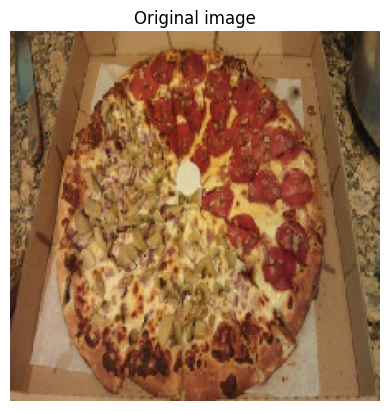

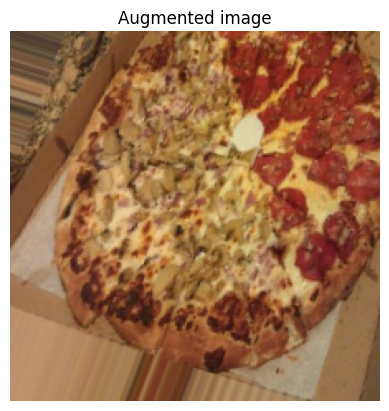

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Lets try it in our model

# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 419ms/step - loss: 0.7324 - accuracy: 0.4507 - val_loss: 0.6674 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 21s 447ms/step - loss: 0.6944 - accuracy: 0.5587 - val_loss: 0.6873 - val_accuracy: 0.5040
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6693 - accuracy: 0.5880 - val_loss: 0.5988 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 20s 429ms/step - loss: 0.6263 - accuracy: 0.6433 - val_loss: 0.6034 - val_accuracy: 0.6140
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.6401 - accuracy: 0.6313 - val_loss: 0.4996 - val_accuracy: 0.7540


In [ ]:
# Let's try it with the shuffle = True

# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 438ms/step - loss: 0.6621 - accuracy: 0.6007 - val_loss: 0.5673 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 20s 424ms/step - loss: 0.5877 - accuracy: 0.6893 - val_loss: 0.4524 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.5157 - accuracy: 0.7613 - val_loss: 0.3932 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4709 - accuracy: 0.7833 - val_loss: 0.3477 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 20s 429ms/step - loss: 0.4668 - accuracy: 0.7867 - val_loss: 0.3768 - val_accuracy: 0.8280


In [ ]:
# Let's try to improve our model with adjusting the hyperparameters

# Lets have a look on our first model Model_1

model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 23s 431ms/step - loss: 0.6749 - accuracy: 0.5707 - val_loss: 0.5312 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5403 - accuracy: 0.7180 - val_loss: 0.4121 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 20s 431ms/step - loss: 0.5328 - accuracy: 0.7407 - val_loss: 0.4022 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 21s 451ms/step - loss: 0.4994 - accuracy: 0.7593 - val_loss: 0.4055 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4839 - accuracy: 0.7753 - val_loss: 0.3366 - val_accuracy: 0.8680


--2024-02-29 11:05:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2024-02-29 11:05:50 (53.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



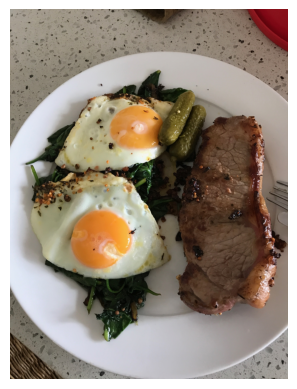

In [ ]:
# Making predictions with our trained model

# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of the image

steak.shape

(4032, 3024, 3)

In [ ]:
# we have to reshape our image to use it our model

# lets create a function for it

def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.

  return img

In [ ]:
# Load and process the image

steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Lets add a dimension to our image shape

print(f"Shape before our dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis = 0)

print(f"Shape after new dimension: {steak.shape}")
steak

Shape before our dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Lets make a prediction on custom image

pred = model_8.predict(steak)
pred

1/1 [==============================] - 1s 508ms/step


array([[0.85927266]], dtype=float32)

In [ ]:
# Lets show our prediction and result

In [ ]:
# We can index the predicted class by rounding the prediction probability

pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
# Lets create a fucntion to display our image

def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  pred_class = class_names[int(tf.round(pred)[0][0])]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 85ms/step


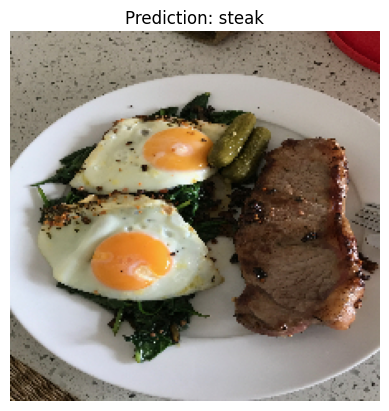

In [ ]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2024-02-29 11:26:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2024-02-29 11:26:46 (51.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 41ms/step


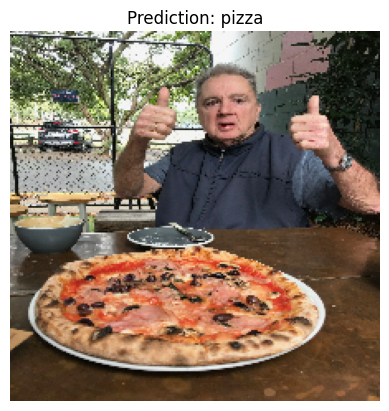

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification

In [ ]:
# import the multi-class data

import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-02-29 11:30:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  90.2MB/s    in 6.9s    

2024-02-29 11:30:18 (71.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Let's start to visulize our data

import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'")

There are 2 directories and 0 image in '10_food_classes_all_data'
There are 10 directories and 0 image in '10_food_classes_all_data/test'
There are 0 directories and 250 image in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 image in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 image in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 image in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 image in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 image in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 image in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 image in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 image in '10_food_classes_all_data/test/grilled_salmon'
There are 10 directories and 0 ima

In [ ]:
# Training and test data set

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Class name for the multi-class data set

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


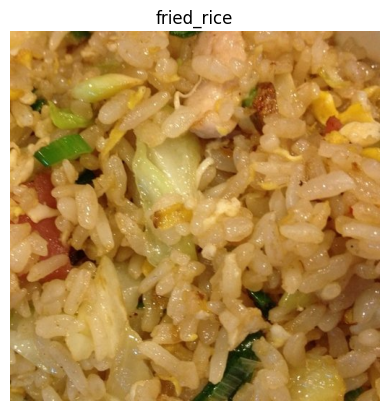

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
# Let's start the preprocessing the data for our model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size = (224, 224),
                                              batch_size = 32,
                                              class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Model making

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation= "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_9.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:
# Fit the model

histor_9 = model_9.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.1229 - accuracy: 0.2253 - val_loss: 1.9673 - val_accuracy: 0.2852
Epoch 2/5
235/235 [==============================] - 29s 123ms/step - loss: 1.8078 - accuracy: 0.3849 - val_loss: 1.8646 - val_accuracy: 0.3536
Epoch 3/5
235/235 [==============================] - 31s 134ms/step - loss: 1.3153 - accuracy: 0.5648 - val_loss: 2.0213 - val_accuracy: 0.3496
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 0.6406 - accuracy: 0.7953 - val_loss: 2.7154 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.2278 - accuracy: 0.9343 - val_loss: 3.9023 - val_accuracy: 0.3036


In [ ]:
# our model is overfitting let's give it data augmentation to prevent the overfitting


In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. ,
                                             rotation_range = 20,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size =(224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:


# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_9)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 447ms/step - loss: 2.1824 - accuracy: 0.1988 - val_loss: 2.0689 - val_accuracy: 0.2540
Epoch 2/5
235/235 [==============================] - 104s 441ms/step - loss: 2.0840 - accuracy: 0.2548 - val_loss: 1.9246 - val_accuracy: 0.3288
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 2.0189 - accuracy: 0.2897 - val_loss: 1.8200 - val_accuracy: 0.3740
Epoch 4/5
235/235 [==============================] - 110s 466ms/step - loss: 1.9653 - accuracy: 0.3135 - val_loss: 1.8321 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 105s 446ms/step - loss: 1.9085 - accuracy: 0.3397 - val_loss: 1.7858 - val_accuracy: 0.3844
